### Observations and Insights

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [55]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [56]:
# Read the mouse data and the study results
study_results_path = "data/Study_results.csv"
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [111]:
# Combine the data into a single dataset
# Display the data table for preview
combined_mice = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")
combined_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [58]:
# Checking the number of mice.
mice_count = combined_mice.groupby(['Mouse ID'])
mice_count.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_count_index = combined_mice.set_index(['Mouse ID', 'Timepoint'])
mice_count_index

Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  \
Mouse ID Timepoint                                                              
b128     0                   45.000000                 0    Capomulin  Female   
         5                   45.651331                 0    Capomulin  Female   
         10                  43.270852                 0    Capomulin  Female   
         15                  43.784893                 0    Capomulin  Female   
         20                  42.731552                 0    Capomulin  Female   
...                                ...               ...          ...     ...   
m601     25                  33.118756                 1    Capomulin    Male   
         30                  31.758275                 1    Capomulin    Male   
         35                  30.834357                 1    Capomulin    Male   
         40                  31.378045                 1    Capomulin    Male   
         45                  28.430964                 1    Capomulin    Male   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
b128     0                   9          22  
         5                   9          22  
         10                  9          22  
         15                  9          22  
         20                  9          22  
...                        ...         ...  
m601     25                 22          17  
         30                 22          17  
         35                 22          17  
         40                 22          17  
         45                 22          17  

[1893 rows x 6 columns]

In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mice.drop_duplicates(subset='Mouse ID', keep='last')
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19
1882,f966,20,30.485985,0,Capomulin,Male,16,17


In [62]:
# Checking the number of mice in the clean DataFrame.
print(clean_df.value_counts('Mouse ID'))

Mouse ID
z969    1
i177    1
j365    1
j296    1
j246    1
       ..
q633    1
q610    1
q597    1
q582    1
a203    1
Length: 249, dtype: int64


### Summary Statistics

In [45]:
# See how many treatment groups there are
#count_treatment = treatment_group.count()
#count_treatment

Timepoint             10
Tumor Volume (mm3)    10
Metastatic Sites      10
Age_months            10
Weight (g)            10
dtype: int64

In [63]:
# generate a summary statics table of mean, median, variance, standard deviation and SEM of the tumor volume for each regimen

tumor_mean = combined_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = combined_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_std =  combined_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_var = combined_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_sem = combined_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [64]:
# Get the summary statistics of the mice
treatment_stats_df = pd.DataFrame({'Mean':tumor_mean,
                                  'Median':tumor_median,
                                   'Standard Deviation':tumor_std,
                                   'Variance':tumor_var,
                                  'Error of Mean':tumor_sem})

treatment_stats_df

,Mean,Median,Standard Deviation,Variance,Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


### Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

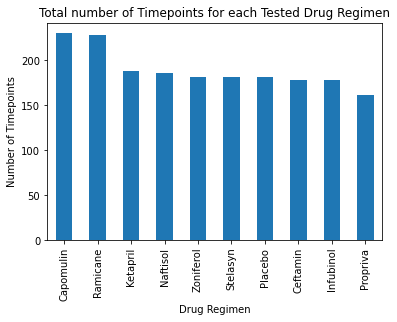

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = combined_mice['Drug Regimen'].value_counts().plot.bar()
pandas_bar.set_title("Total number of Timepoints for each Tested Drug Regimen")
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Timepoints")

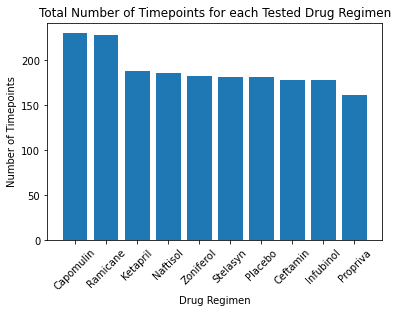

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
values = combined_mice['Drug Regimen'].value_counts()
x_axis = np.arange(len(values))
plt.bar(x_axis, values)
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, values.index.values)
plt.xticks(rotation=45)

# Set the labels for the chart
plt.title("Total Number of Timepoints for each Tested Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
          
plt.show()

Text(0, 0.5, '')

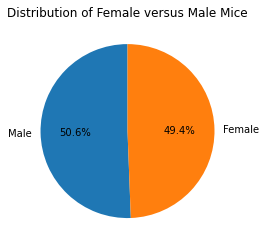

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = combined_mice['Sex'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
pandas_pie.set_title("Distribution of Female versus Male Mice")
pandas_pie.set_ylabel('')

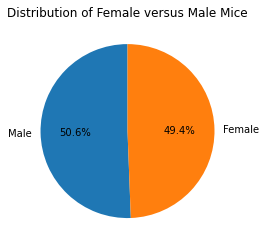

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = combined_mice['Sex'].value_counts()
plt.pie(sexes, labels=sexes.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female versus Male Mice")
plt.show()

### Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create empty list to fill with tumor volume data (for plotting)


In [99]:
Capomulin_df = clean_df[clean_df['Drug Regimen']=="Capomulin"].copy()
Capomulin_df = Capomulin_df.set_index('Mouse ID')
Capomulin_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,45,38.982878,2,Capomulin,Female,9,22
j246,35,38.753265,1,Capomulin,Female,21,21
r554,45,32.377357,3,Capomulin,Female,8,17
s185,45,23.343598,1,Capomulin,Female,3,17
b742,45,38.939633,0,Capomulin,Male,7,21
x401,45,28.484033,0,Capomulin,Female,16,15
l509,45,41.483008,3,Capomulin,Male,17,21
s710,45,40.728578,1,Capomulin,Female,1,23
r157,15,46.539206,0,Capomulin,Male,22,25


In [40]:
# Ramicane_df = clean_[clean_df['Drug Regimen']=="Ramicane"].copy()
# Ramicane_df = Ramicane_df.set_index('Mouse ID')
# Ramicane_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
c458,30,38.342008,2,Ramicane,Female,23,20
q610,35,36.561652,2,Ramicane,Female,18,21
j913,45,31.560470,1,Ramicane,Female,4,17
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25


In [41]:
# Infubinol_df = clean_df[clean_df['Drug Regimen']=="Infubinol"].copy()
# Infubinol_df = Infubinol_df.set_index('Mouse ID')
# Infubinol_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
c326,5,36.321346,0,Infubinol,Female,18,25
c139,45,72.226731,2,Infubinol,Male,11,28
v339,5,46.250112,0,Infubinol,Male,20,26
a577,30,57.031862,2,Infubinol,Female,6,25
y163,45,67.685569,3,Infubinol,Female,17,27


In [42]:
# Ceftamin_df = clean_df[clean_df['Drug Regimen']=="Ceftamin"].copy()
# Ceftamin_df = Ceftamin_df.set_index('Mouse ID')
# Ceftamin_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
x822,45,61.386660,3,Ceftamin,Male,3,29
l558,10,46.784535,0,Ceftamin,Female,13,30
l733,45,64.299830,1,Ceftamin,Female,4,30
f436,15,48.722078,2,Ceftamin,Female,3,25
l490,30,57.918381,3,Ceftamin,Male,24,26


In [81]:
# Start by getting the last (greatest) timepoint for each mouse
treatment_group_df = pd.DataFrame(combined_mice.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Last Timepoint'})
treatment_group_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_group_df = pd.merge(combined_mice,treatment_group_df, on='Mouse ID')
combined_group_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = []

for treatment in treatments:
    
    temp_df = combined_group_df.loc[combined_group_df['Drug Regimen']==treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Last Timepoint']]
    
    volumes = temp_df['Tumor Volume (mm3)']
    tumor_vol.append(volumes)
    
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    print(f"The lower quartile of {treatment}'s volumes is: {lowerq}")
    print(f"The upper quartile of {treatment}'s volumes is: {upperq}")
    print(f"The interquartile range of {treatment}'s volumes is: {iqr}")
    print(f"The the median of {treatment}'s volumes is: {quartiles[0.5]} ")
    
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values of {treatment} below {lower_bound} could be outliers.")
    print(f"Values of {treatment} above {upper_bound} could be outliers.")
    print("-"*40)
    

The lower quartile of Capomulin's volumes is: 37.685932865
The upper quartile of Capomulin's volumes is: 45.0
The interquartile range of Capomulin's volumes is: 7.314067135000002
The the median of Capomulin's volumes is: 41.557808879999996 
Values ofCapomulin below 26.714832162499995 could be outliers.
Values od Capomulin above 55.9711007025 could be outliers.
----------------------------------------
The lower quartile of Ramicane's volumes is: 36.67463458499999
The upper quartile of Ramicane's volumes is: 45.0
The interquartile range of Ramicane's volumes is: 8.325365415000007
The the median of Ramicane's volumes is: 40.67323554 
Values ofRamicane below 24.18658646249998 could be outliers.
Values od Ramicane above 57.48804812250001 could be outliers.
----------------------------------------
The lower quartile of Infubinol's volumes is: 47.3123533
The upper quartile of Infubinol's volumes is: 57.314443967500004
The interquartile range of Infubinol's volumes is: 10.002090667500006
The t

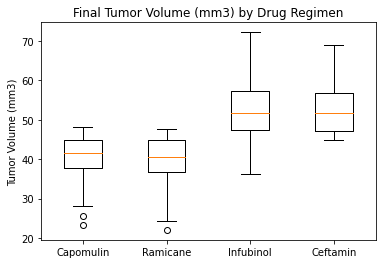

In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)
plt.title('Final Tumor Volume (mm3) by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.xticks([1,2,3,4,], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

#plt.grid()
plt.show()

### Line and Scatter Plots

In [120]:
Capomulin_df = combined_group_df[combined_group_df['Drug Regimen']=="Capomulin"]
Capomulin_df = Capomulin_df.set_index('Sex')

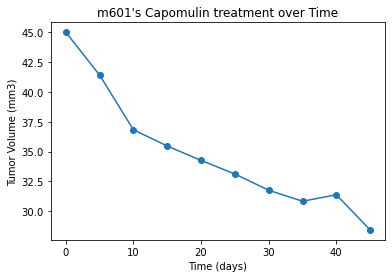

In [121]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = Capomulin_df.loc[Capomulin_df['Mouse ID'] == 'm601']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

plt.title("m601's Capomulin treatment over Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [125]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_scatter = combined_group_df[combined_group_df['Drug Regimen']=="Capomulin"]
Capomulin_scatter = Capomulin_df.set_index('Age_months')
Capomulin_scatter

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Weight (g),Last Timepoint
Age_months,,,,,,,
9,b128,0,45.000000,0,Capomulin,22,45
9,b128,5,45.651331,0,Capomulin,22,45
9,b128,10,43.270852,0,Capomulin,22,45
9,b128,15,43.784893,0,Capomulin,22,45
9,b128,20,42.731552,0,Capomulin,22,45
...,...,...,...,...,...,...,...
22,m601,25,33.118756,1,Capomulin,17,45
22,m601,30,31.758275,1,Capomulin,17,45
22,m601,35,30.834357,1,Capomulin,17,45


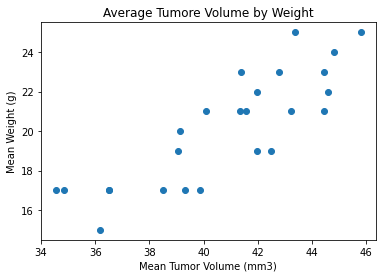

In [126]:
# tumor volume average
tumor_volume_average = pd.DataFrame(Capomulin_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

mouse_weight_average = pd.DataFrame(Capomulin_scatter.groupby('Mouse ID')['Weight (g)'].mean())

x = tumor_volume_average
y = mouse_weight_average

plt.scatter(x,y)

plt.xlabel('Mean Tumor Volume (mm3)')
plt.ylabel('Mean Weight (g)')
plt.title('Average Tumore Volume by Weight')

plt.show()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g),Last Timepoint
Sex,,,,,,,,
Female,b128,0,45.000000,0,Capomulin,9,22,45
Female,b128,5,45.651331,0,Capomulin,9,22,45
Female,b128,10,43.270852,0,Capomulin,9,22,45
Female,b128,15,43.784893,0,Capomulin,9,22,45
Female,b128,20,42.731552,0,Capomulin,9,22,45
...,...,...,...,...,...,...,...,...
Male,m601,25,33.118756,1,Capomulin,22,17,45
Male,m601,30,31.758275,1,Capomulin,22,17,45
Male,m601,35,30.834357,1,Capomulin,22,17,45


In [ ]:
 treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = []

for treatment in treatments:
    
    temp_df = combined_group_df.loc[combined_group_df['Drug Regimen']==treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume_df = temp_df.loc[temp_df['Tumor Volume (mm3)'] == temp_df['Last Timepoint']]
    
    volumes = temp_df['Tumor Volume (mm3)']
    tumor_vol.append(volumes)

### Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 


In [ ]:
# for mouse weight and average tumor volume for the Capomulin regimen
 

In [22]:
Capomulin_group = "Capomulin"


'Capomulin'

In [ ]:
Ceftamin_group 

In [ ]:
Infubinol_group

In [ ]:
Ketapril_group

In [ ]:
Naftisol_group

In [ ]:
Placebo_group

In [ ]:
Propriva_group

In [ ]:
Ramicane_group

In [ ]:
Stelasyn_group

In [ ]:
Zoniferol_group

In [71]:
mean = combined_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64